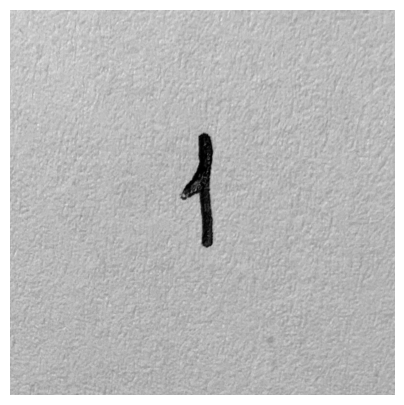

shape: (800, 800)
min: 0.0
max: 0.9603


In [37]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
np.set_printoptions(linewidth=200)   # print full array/matrix

original_image = mpimg.imread('../../images/1.png')
original_grey = np.dot(original_image[..., :3], [0.2989, 0.5870, 0.1140])
image = np.dot(original_image[..., :3], [0.2989, 0.5870, 0.1140])

plt.figure(figsize=(5, 5))

plt.imshow(original_grey, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.show()

print(f'shape: {original_grey.shape}')
print(f'min: {round(original_grey.min(), 4)}')
print(f'max: {round(original_grey.max(), 4)}')

In [38]:
# valor más repetido
def mas_repetido(image, value=None, delta=None):   # value: 'min' | 'max'
    minimo = image.min()
    maximo = image.max()
    
    if value == None:
        valores, conteos = np.unique(image, return_counts=True)
        rep = valores[np.argmax(conteos)]
        return rep
    elif value == 'min':   # min: mas oscuros
        rango_min = minimo + delta
        rango = image[(image >= minimo) & (image <= rango_min)]
        valores, conteos = np.unique(rango, return_counts=True)
        rep = valores[np.argmax(conteos)]
        return rep
    elif value == 'max':   # min: mas claros
        rango_max = maximo - delta
        rango = image[(image <= maximo) & (image >= rango_max)]
        valores, conteos = np.unique(rango, return_counts=True)
        rep = valores[np.argmax(conteos)]
        return rep
    
# Detectar si es similar a rep
def rep_to_color(valor, rep, delta):
    if abs(valor - rep) <= delta: return True
    else: return False

# cambiar color mas oscuro y mas repetido (texto) a negro
def toBlack(image, delta1, delta2):
    rep = mas_repetido(image, 'min', delta1)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if rep_to_color(image[i, j], rep, delta2):
                image[i, j] = 0
    return image

# suponiendo que todos los oscuros ya se convirtieron a 0, convertir todo el resto en 1
def toWhite(image):
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i, j] != 0:
                image[i, j] = 1
    return image

# dividir matriz en sub matrices
def dividir(matrix, n):
    sub_matrices = []
    
    for i in range(0, matrix.shape[0], n):
        for j in range(0, matrix.shape[1], n):
            submatriz = matrix[i:i+n, j:j+n]
            sub_matrices.append(submatriz)
    return sub_matrices

def func(image, delta1, delta2):
    # toBlack
    rep = mas_repetido(image, 'min', delta1)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if rep_to_color(image[i, j], rep, delta2):
                image[i, j] = 0

    # toWhite
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i, j] != 0:
                image[i, j] = 1
                
    # blank
    if np.all(image == 0):
        image = np.ones(image.shape)
        
    return image

# definir tono actual
def tono(valor, delta, min_rep, max_rep):
    if abs(valor - min_rep) <= delta: return 0
    elif abs(valor - max_rep) <= delta: return 1

#### Convertir a blanco y negro

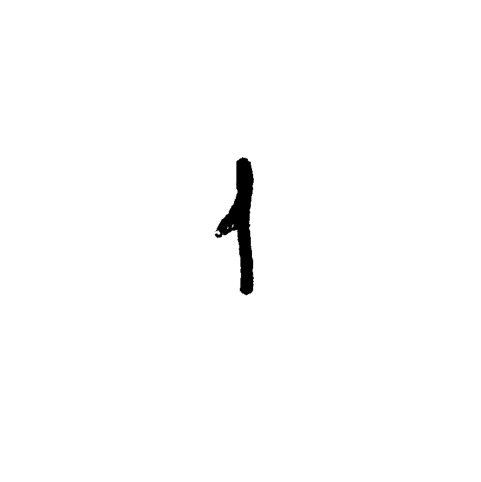

In [39]:
image = toBlack(image, 0.05, 0.4)
image = toWhite(image)

plt.figure(figsize=(6, 6))

plt.imshow(image, cmap='gray',vmin=0, vmax=1)
plt.axis('off')

plt.show()

#### Mejorar imperfecciones

In [40]:
def vecinos(image, coord, r):
    vecinos = []
    i = coord[0]
    j = coord[1]
    down_lim = image.shape[0] - 1
    left_lim = image.shape[1] - 1
    
    for R in range(1, r + 1):
        if i - R >= 0:
            vecinos.append(image[i-R, j])
        if i + R <= down_lim:
            vecinos.append(image[i+R, j])
        if j - R >= 0:
            vecinos.append(image[i, j-R])
        if j + R <= left_lim:
            vecinos.append(image[i, j+R])
        
    return np.array(vecinos)

In [41]:
def porcentaje_vecinos(image, r, p):
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            vecinos_lst = vecinos(image, (i, j), r)
            if image[i, j] == 1:
                porcentaje = len(vecinos_lst[vecinos_lst == 0]) / len(vecinos_lst)
                if porcentaje >= p:
                    image[i, j] = 0
    return image

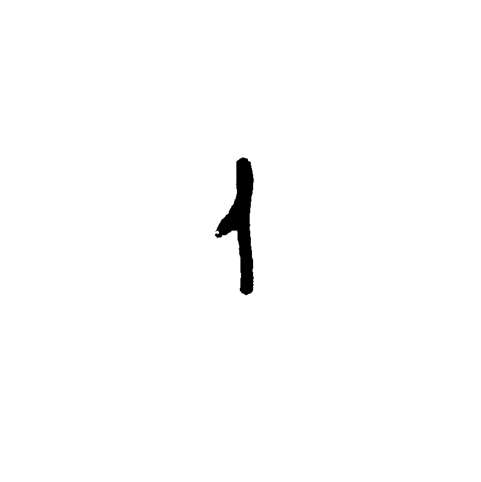

In [42]:
image = porcentaje_vecinos(image, 6, 0.55)

plt.figure(figsize=(6, 6))

plt.imshow(image, cmap='gray',vmin=0, vmax=1)
plt.axis('off')

plt.show()